In [23]:
# Download Time Series Graph such as apple stock historical prices graph by google finance
import pandas as pd

df=pd.read_csv("/Apple_Historical_Data.csv",parse_dates=["Date"],index_col="Date")
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-05-21,$202.09,59211770,$205.17,$207.04,$200.71
2025-05-20,$206.86,42496640,$207.67,$208.47,$205.03
2025-05-19,$208.78,46140530,$207.91,$209.48,$204.26
2025-05-16,$211.26,54737850,$212.36,$212.57,$209.77
2025-05-15,$211.45,45029470,$210.95,$212.96,$209.54


In [27]:
# (1) Date Time Index - Means to make date/time as index
df.index

DatetimeIndex(['2025-05-21', '2025-05-20', '2025-05-19', '2025-05-16',
               '2025-05-15', '2025-05-14', '2025-05-13', '2025-05-12',
               '2025-05-09', '2025-05-08', '2025-05-07', '2025-05-06',
               '2025-05-05', '2025-05-02', '2025-05-01', '2025-04-30',
               '2025-04-29', '2025-04-28', '2025-04-25', '2025-04-24',
               '2025-04-23', '2025-04-22'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [33]:
# Now if i want to get data of April Month 2025 then i can do partial indexing
df.loc["2025-04"]

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-04-30,$212.50,52286450,$209.30,$213.58,$206.6705
2025-04-29,$211.21,36827630,$208.693,$212.24,$208.37
2025-04-28,$210.14,38743070,$210.00,$211.50,$207.46
2025-04-25,$209.28,38222260,$206.365,$209.75,$206.20
2025-04-24,$208.37,47310990,$204.89,$208.8299,$202.94
2025-04-23,$204.60,52929170,$206.00,$208.00,$202.799
2025-04-22,$199.74,52976370,$196.12,$201.59,$195.97


In [58]:
# Now we have to find average in month of april
df2 = df.copy()
df2["Close/Last"] = df2["Close/Last"].str.replace("$", "", regex=False).astype(float).astype(int)
april_avg = df2.loc['2025-04', "Close/Last"].mean()
print("Average In Month Of April:",april_avg)

Average In Month Of April: 207.57142857142858


In [70]:
# Now i want prices between 2025-04-23 to 2025-04-28
df3 = df2.copy()
df3 = df3.sort_index()  # 👈 Sort the DatetimeIndex
result = df3.loc["2025-04-23":"2025-04-28"]
result

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-04-23,204,52929170,$206.00,$208.00,$202.799
2025-04-24,208,47310990,$204.89,$208.8299,$202.94
2025-04-25,209,38222260,$206.365,$209.75,$206.20
2025-04-28,210,38743070,$210.00,$211.50,$207.46


In [82]:
# (2) Resampling
%matplotlib inline
df4 = df.copy()

# Remove $ sign and convert to float
df4["Close/Last"] = df4["Close/Last"].str.replace("$", "", regex=False).astype(float)

# Make sure the index is datetime
df4.index = pd.to_datetime(df4.index)

# Resample monthly (month-end) and calculate mean
monthly_avg = df4["Close/Last"].resample("ME").mean()

monthly_avg

,Close/Last
Date,
2025-04-30,207.977143
2025-05-31,205.655333


<Axes: xlabel='Date'>

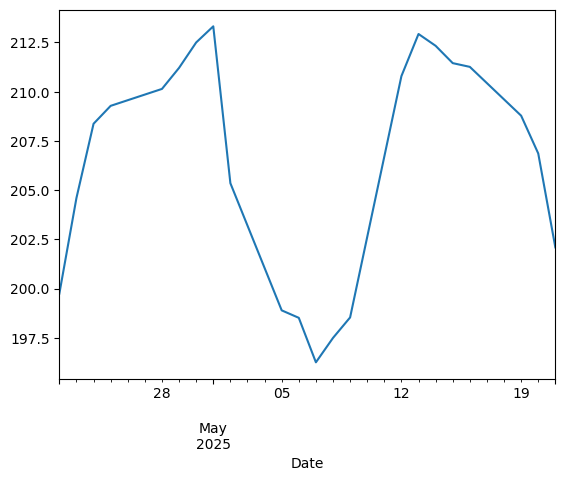

In [84]:
# Now lets plot a chart on daily basis
%matplotlib inline
df5 = df.copy()
df5["Close/Last"] = df5["Close/Last"].str.replace("$", "", regex=False).astype(float)
df5.index = pd.to_datetime(df5.index)
Daily_avg = df5["Close/Last"].resample("D").mean()

Daily_avg.interpolate().plot()

<Axes: xlabel='Date'>

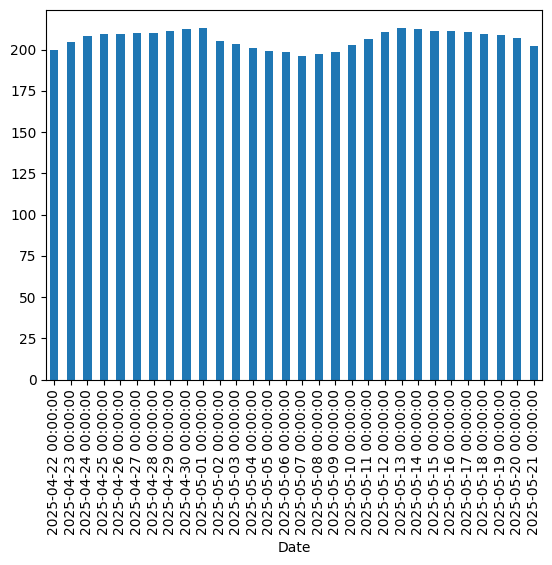

In [85]:
# We ca also change the type of chart
Daily_avg.interpolate().plot(kind="bar")